In [1]:
import pandas as pd

# Análisis de los datos

In [2]:
df = pd.read_csv('data/diamonds_train.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


Vemos que **no hay valores nulos**

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Precios máximo y mínimo

In [41]:
print(df["price"].max())
print(df["price"].min())

18823
326


## Precio medio

In [15]:
print(df["price"].mean())

3928.444469163268


## Mediana (del precio)

In [42]:
print(df["price"].median())

2397.0


## Desviación típica del precio

In [43]:
print(df["price"].std())

3992.4161466170863


## Intervalo de confianza del precio

In [38]:
from scipy.stats import t, sem

confidence_level = 0.95
price_mean = df["price"].mean()
degrees_of_freedom = df["price"].count() - 1
price_standard_error = sem(df["price"])

confidence_min, confidence_max =t.interval(confidence_level, degrees_of_freedom, price_mean, price_standard_error)

print(f"El intervalo de confianza del precio esta entre {confidence_min} y {confidence_max}")

El intervalo de confianza del precio esta entre 3889.5389884596434 y 3967.3499498668925


## Creo una nueva columna
Creo una nueva columna llamada **VOLUME** derivada de las columnas "x", "y" y "z".

In [22]:
df["VOLUME"] = df["x"] * df["y"] * df["z"]

## Los cinco diamantes más caros

In [29]:
df.sort_values(by="price", ascending=False).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,VOLUME
7034,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,371.494200
3990,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,317.333520
29107,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,249.029352
25529,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,377.248560
618,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91,320.144766


## Los cinco diamantes más baratos

In [44]:
df.sort_values(by="price", ascending=True).head()

,carat,cut,color,clarity,depth,table,price,x,y,z,VOLUME
18377,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
9782,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
18381,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
20968,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
12084,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


## Conclusión
Parece que hay correlación clara entre:
- **VOLUME** y **precio**.
- **carat** y **precio**.

# Visualización de datos

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

## Histogramas
De algunas variables numéricas.

### Precio
Se ve en la distribución que la mayoría están por debajo de los 5.000. Y muy pocos llegan a alcanzar los casi 200.000. 

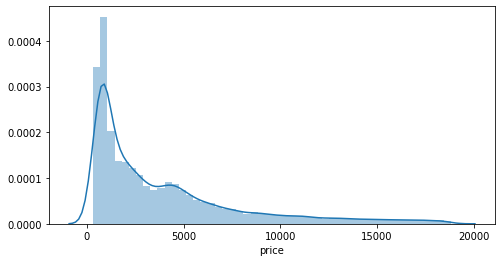

In [132]:
fig, axes = plt.subplots(figsize=(8, 4))
sns.distplot(df["price"])
plt.show();

### Volumen
Es la nueva columna que he creado a partir de las columnas "x", "y" y "z".

Se ve que la mayoría se encuentran entre los 0 y 500.

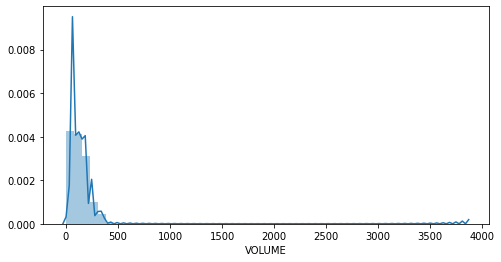

In [133]:
fig, axes = plt.subplots(figsize=(8, 4))
axes = sns.distplot(df["VOLUME"])
plt.show();

### Quilates
La mayoría están entre 0 y 2 siendo los de 3, 4 o más muy raros.

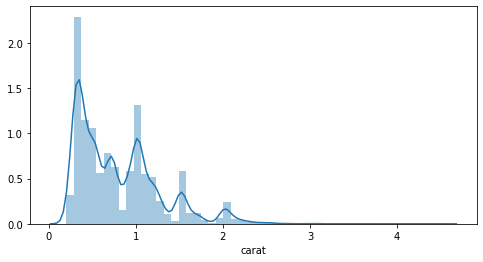

In [134]:
fig, axes = plt.subplots(figsize=(8, 4))
axes = sns.distplot(df["carat"])
plt.show();

### Depth
Parece una distribución normal.

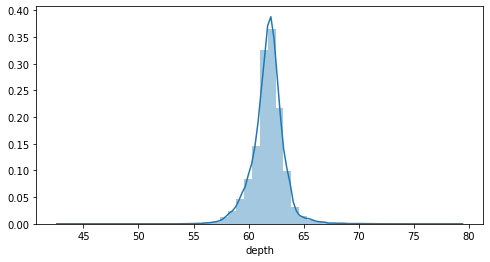

In [135]:
fig, axes = plt.subplots(figsize=(8, 4))
axes = sns.distplot(df["depth"])
plt.show();

### Table
Los valores se concentran entre 55 y 65 aproximadamente.

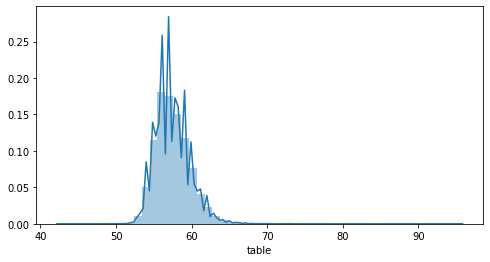

In [136]:
fig, axes = plt.subplots(figsize=(8, 4))
axes = sns.distplot(df["table"])
plt.show();

## Precio vs Color

### Barplot
Calculamos el **precio medio** por **color**.

Este resultado es raro porque según la descripción del dataset de Kaggle estos colores van de "D", el mejor hasta "J", el peor. 

In [98]:
df_price_by_color = df.groupby(by="color").agg({"price": "mean"}).reset_index()

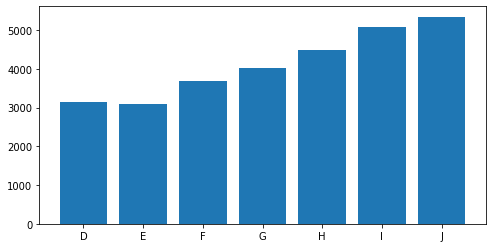

In [102]:
fig, axes = plt.subplots(figsize=(8, 4))
axes.bar(df_price_by_color['color'], df_price_by_color["price"])
plt.show();

### Boxplot
Vemos que el color "I" y "J" están bastante dispersos, el 50% de los diamantes en estos colores están entre 2500 y 7500. Mientras que los diamantes "D" y "E", en teoría los mejores colores, están más concentrados por debajo de entre 2000 y 5000.

Todos los colores tienen outliers muy caros, por encima de los 175000.

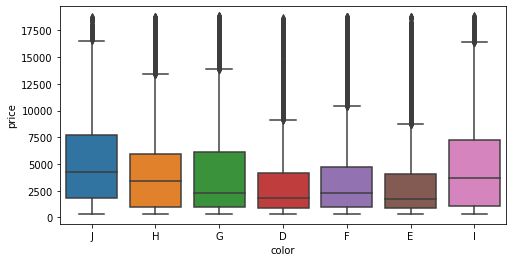

In [115]:
fig, axes = plt.subplots(figsize=(8, 4))
axes = sns.boxplot(x=df['color'], y=df["price"])
plt.show();

## Precio vs Corte

### Barplot
También voy a calcular el **precio medio** esta vez por el tipo de **corte** y pintarlo en un gráfico de barras.

Según la descripción de Kaggle el orden de los cortes de peor a mejor es: Fair, Good, Very Good, Premium, Ideal.

Los cortes "Premium" los más caros de media, esto está dentro de lo esperado. Pero sin embargo los "Fair" que en teoría son los peores resultan ser los segundos más caros de media. También sorprende que los cortes "Ideal" (los mejores en teoría) son los que tienen un precio medio más bajo.

In [145]:
df_price_by_cut = df.groupby(by="cut").agg({"price": "mean"}).reset_index().sort_values(by="price")

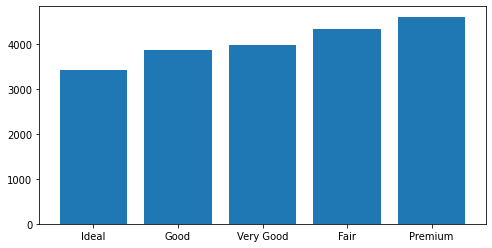

In [146]:
fig, axes = plt.subplots(figsize=(8, 4))
axes.bar(df_price_by_cut['cut'], df_price_by_cut["price"])
plt.show();

### Boxplot
Vemos que los cortes "Fair" están muy concentrados entre los 2500 y los 5000 (el 50% de estos diamantes están entre esos precios).

También choca que la mediana de los cortes "Ideal" es la más baja de todas (alrededor de 2500).

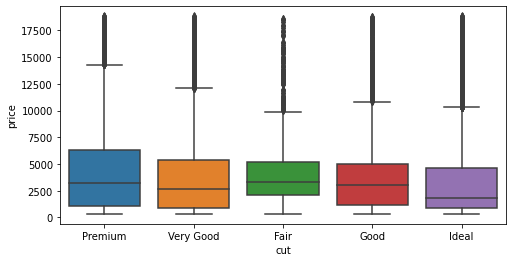

In [119]:
fig, axes = plt.subplots(figsize=(8, 4))
axes = sns.boxplot(x=df['cut'], y=df["price"])
plt.show();

## Precio vs Clarity
Según la descripción del dataset de Kaggle los valores pueden ser: I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))

### Barplot
Hago un barplot del precio medio comparado con el valor de *clarity*.

Se observa como los diamantes SI2 (la segunda peor claridad) son los que de media son más caros por bastante diferencia.

Sin embargo los IF (la mejor claridad) es la segunda con un precio medio más bajo. 

In [141]:
df_price_by_clarity = df.groupby(by="clarity").agg({"price": "mean"}).reset_index().sort_values(by="price")

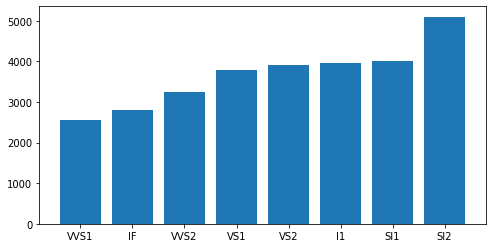

In [142]:
fig, axes = plt.subplots(figsize=(8, 4))
axes.bar(df_price_by_clarity['clarity'], df_price_by_clarity["price"])
plt.show();

## Correlation Matrix
Se observa que es fuerte la correlación del precio con volumen y quilates (*carat*).

La correlación con *table* es más dévil.

La correlación con *depth* directamente es negativa y muy pequeña.

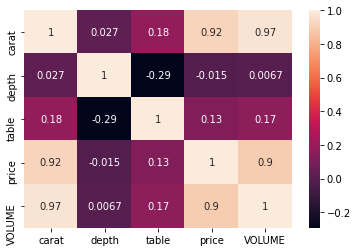

In [150]:
# Quito las columnas "x", "y" y "z"
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'VOLUME']
corr_matrix = df[cols].corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [151]:
corr_matrix

,carat,depth,table,price,VOLUME
carat,1.000000,0.026528,0.183392,0.921935,0.971851
depth,0.026528,1.000000,-0.293114,-0.014864,0.006721
table,0.183392,-0.293114,1.000000,0.130111,0.168437
price,0.921935,-0.014864,0.130111,1.000000,0.898684
VOLUME,0.971851,0.006721,0.168437,0.898684,1.000000
